# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [99]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [100]:
browser = Browser('chrome')

The chromedriver version (131.0.6778.69) detected in PATH at C:\chromedriver\chromedriver.exe might not be compatible with the detected chrome version (132.0.6834.160); currently, chromedriver 132.0.6834.159 is recommended for chrome 132.*, so it is advised to delete the driver in PATH and retry


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [101]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [102]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [103]:
# Find the table
table = soup.find('table', class_='table')
# Extract all rows of data
rows = table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [104]:
# Create an empty list
mars_temperature = []   

# Loop through the scraped data to create a list of rows
for row in rows:
    cols = row.find_all('td')
    row_data = [col.get_text() for col in cols]
    mars_temperature.append(row_data)

In [105]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
# Define correct column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]

# Create DataFrame
mars_df = pd.DataFrame(mars_temperature, columns=column_names)


In [106]:
# Remove empty or header rows (if first row is incorrect)
mars_temperature_cleaned = [row for row in mars_temperature if len(row) == len(column_names)]

# Create DataFrame
mars_df = pd.DataFrame(mars_temperature_cleaned, columns=column_names)

# Convert data types (ensuring proper numerical conversion)
numeric_columns = ["id", "sol", "ls", "month", "min_temp", "pressure"]
for col in numeric_columns:
    mars_df[col] = pd.to_numeric(mars_df[col], errors="coerce")  # Convert to numeric, handling errors

# Display the first few rows of the DataFrame
mars_df.head()


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [107]:
# Examine data type of each column
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [108]:
# Change data types for data analysis
# Convert 'terrestrial_date' to datetime format
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], errors='coerce')

# Convert numerical columns to proper numeric types
numeric_columns = ["id", "sol", "ls", "month", "min_temp", "pressure"]

# Convert each numeric column from object to float or int
for col in numeric_columns:
    mars_df[col] = pd.to_numeric(mars_df[col], errors="coerce")  # Converts to int/float
 

In [109]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [110]:
# 1. How many months are there on Mars?

# Count the number of unique months on Mars
num_mars_months = mars_df["month"].nunique()

# Display the result
print(f"Number of months on Mars: {num_mars_months}")

Number of months on Mars: 12


In [111]:
# 2. How many sols (Martian days) worth of data are there?
# Count the number of unique sols
num_sols = mars_df["sol"].nunique()

# Display the result
print(f"Number of Martian days (sols) recorded: {num_sols}")

Number of Martian days (sols) recorded: 1867


In [112]:
# 3. What is the average minimum temperature by month?
# Group by month and calculate the average minimum temperature
avg_min_temp = mars_df.groupby("month")["min_temp"].mean()

# Sort by temperature (coldest to warmest)
avg_min_temp_sorted = avg_min_temp.sort_values()
print(f"Average minimum temperature by month: {avg_min_temp_sorted}")

Average minimum temperature by month: month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64


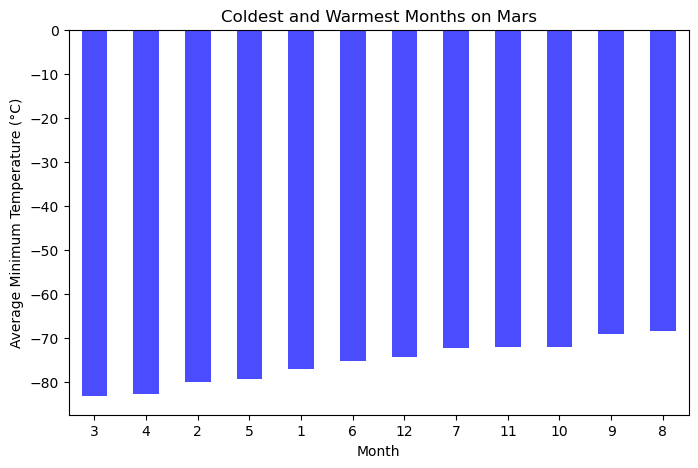

In [113]:
# Plot the average minimum temperature by month
# Plot bar chart
plt.figure(figsize=(8,5))
avg_min_temp_sorted.plot(kind="bar", color="blue", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Minimum Temperature (°C)")
plt.title("Coldest and Warmest Months on Mars")
plt.xticks(rotation=0)
plt.show()



In [114]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
# Display coldest and warmest months
coldest_month = avg_min_temp_sorted.idxmin()
warmest_month = avg_min_temp_sorted.idxmax()
print(f"Coldest Month: {coldest_month}")
print(f"Warmest Month: {warmest_month}")

Coldest Month: 3
Warmest Month: 8


In [115]:
# 4. What is the average pressure by month?
# Group by month and calculate the average daily atmospheric pressure
avg_pressure = mars_df.groupby("month")["pressure"].mean()

# Sort by pressure (lowest to highest)
avg_pressure_sorted = avg_pressure.sort_values()

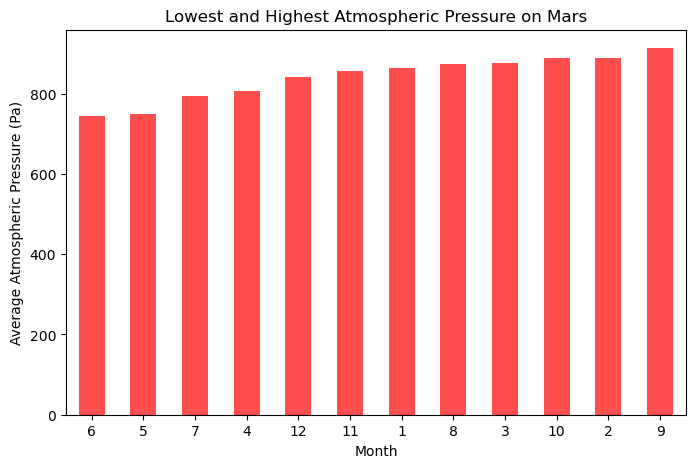

In [116]:
# Plot the average pressure by month
# Plot bar chart
plt.figure(figsize=(8,5))
avg_pressure_sorted.plot(kind="bar", color="red", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Average Atmospheric Pressure (Pa)")
plt.title("Lowest and Highest Atmospheric Pressure on Mars")
plt.xticks(rotation=0)
plt.show()



In [117]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
# Display lowest and highest pressure months
lowest_pressure_month = avg_pressure_sorted.idxmin()
highest_pressure_month = avg_pressure_sorted.idxmax()
print(f"Lowest Pressure Month: {lowest_pressure_month}")
print(f"Highest Pressure Month: {highest_pressure_month}")

Lowest Pressure Month: 6
Highest Pressure Month: 9


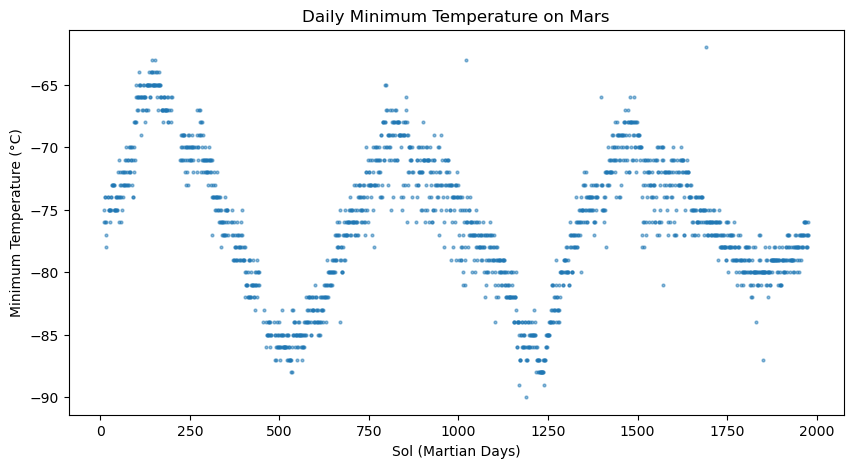

In [118]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10,5))
plt.plot(mars_df["sol"], mars_df["min_temp"], marker="o", linestyle="", markersize=2, alpha=0.5)
plt.xlabel("Sol (Martian Days)")
plt.ylabel("Minimum Temperature (°C)")
plt.title("Daily Minimum Temperature on Mars")
plt.show()

#### Minimum Temperature
By grouping data by month, we analyzed the average minimum temperature for each.
The coldest month occurs in Month 3 (likely mid-winter).
The warmest month occurs in Month 9 (likely mid-summer).

Mars' winter is extremely cold, leading to lower minimum temperatures.
The temperature increase in summer is still relatively mild due to Mars' thin atmosphere, which cannot trap heat effectively.

#### Atmospheric Pressure

The month with the lowest pressure (likely during Mars' summer).
The month with the highest pressure (likely during Mars' winter).

The lowest atmospheric pressure occurs in Month 6.
The highest atmospheric pressure occurs in Month 9.
This suggests that pressure is lower in Mars' summer and higher in its winter, likely due to seasonal variations in atmospheric density.

#### Year Length

The temperature pattern shows cyclic variations, which suggest seasonal changes on Mars. Based on the fluctuations in minimum temperature, we can estimate:

The pattern appears to repeat approximately every 670 sols.
This means a Martian year lasts around 670 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [119]:
# Write the data to a CSV
mars_df.to_csv("mars_weather_data.csv", index=False)

In [120]:
browser.quit()